## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df= pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)


In [4]:
mouse_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset.  
# Take value counts and add to index.

mouse_metadata_df = pd.merge(mouse_df, study_df, how="outer", on=["Mouse ID", "Mouse ID"]) 

mouse_metadata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mouse_metadata_df['Mouse ID'].nunique() 


249

In [8]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

get_duplicates = mouse_metadata_df.loc[mouse_metadata_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique() 

# Optional: Get all the data for the duplicate mouse ID. 
print("We determined the duplicate mouse record is " + get_duplicates) 

['We determined the duplicate mouse record is g989']


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
clean_df = mouse_metadata_df[mouse_metadata_df['Mouse ID'].isin(get_duplicates) == False]

# Format the table
# clean_df["Tumor Volume (mm3)"] = clean_df["Tumor Volume (mm3)"].map("{:.2f}".format)

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.

clean_df.count()["Mouse ID"]  

1880

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_by_regimen = clean_df.groupby("Drug Regimen")
summary_stats = grouped_by_regimen.describe() 

summary_stats


Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [49]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # assemble the resulting series into a single summary dataframe.

# Store the Mean "Tumor Volume Data" Grouped by Drug 
clean_df_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]  
#clean_df_mean

# Store the Median "Tumor Volume Data" Grouped by Drug 
clean_df_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]  
#clean_df_median

# Store the Variance "Tumor Volume Data" Grouped by Drug 
clean_df_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#clean_df_var 

# Store the Standard Deviation "Tumor Volume Data" Grouped by Drug 
clean_df_sd = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
clean_df_sd 

# Store the SEM "Tumor Volume Data" Grouped by Drug 
clean_df_se = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
clean_df_se 

summary_dataframe = pd.DataFrame({"Mean": clean_df_mean, "Median":clean_df_median, "Variance": clean_df_var, 
              "Standard Deviation": clean_df_sd, "Standard Error": clean_df_se})

In [50]:
# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})  


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

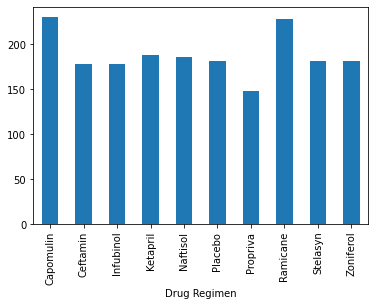

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurements = clean_df.groupby("Drug Regimen").count()["Mouse ID"] 

total_measurements.plot(kind="bar")

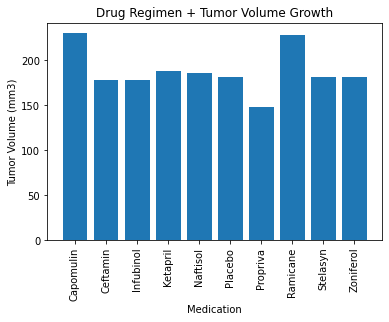

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(total_measurements.index.values, total_measurements.values)

# Give our chart some labels and a tile
plt.title("Drug Regimen + Tumor Volume Growth")
plt.xlabel("Medication")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=90)
plt.show() 

<AxesSubplot:ylabel='Mouse ID'>

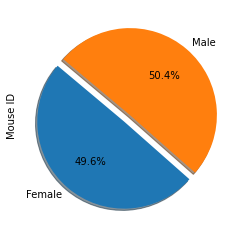

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = clean_df.groupby("Sex").nunique()["Mouse ID"]
explode = (0.1, 0)

gender_distribution.plot(kind="pie", shadow=True, explode=explode, startangle=140, autopct="%1.1f%%") 


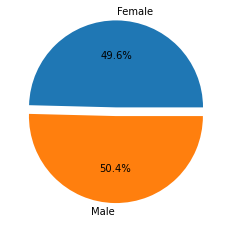

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0)
autopct =("%1.1f%%") 


plt.pie(gender_distribution.values, labels=gender_distribution.index.values, explode=explode, autopct=autopct)
plt.show() 




## Quartiles, Outliers and Boxplots

In [63]:
# Group by Mouse ID

final_volumes = clean_df.groupby("Mouse ID").last()[["Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]

# Create a list of the final tumor volume of each mouse across four of the treatment regimens:  
        #Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = [] 

# This wants you to create a list. 
final_volumes = final_volumes.loc[final_volumes["Drug Regimen"].isin(drugs)] 

final_volumes

for drug in drugs:
    split_drugs = final_volumes.loc[final_volumes["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(split_drugs) 

tumor_volume
    



[Mouse ID
 b128    38.982878
 b742    38.939633
 f966    30.485985
 g288    37.074024
 g316    40.159220
 i557    47.685963
 i738    37.311846
 j119    38.125164
 j246    38.753265
 l509    41.483008
 l897    38.846876
 m601    28.430964
 m957    33.329098
 r157    46.539206
 r554    32.377357
 r944    41.581521
 s185    23.343598
 s710    40.728578
 t565    34.455298
 u364    31.023923
 v923    40.658124
 w150    39.952347
 w914    36.041047
 x401    28.484033
 y793    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 Mouse ID
 a411    38.407618
 a444    43.047543
 a520    38.810366
 a644    32.978522
 c458    38.342008
 c758    33.397653
 d251    37.311236
 e662    40.659006
 g791    29.128472
 i177    33.562402
 i334    36.374510
 j913    31.560470
 j989    36.134852
 k403    22.050126
 m546    30.564625
 n364    31.095335
 q597    45.220869
 q610    36.561652
 r811    37.225650
 r921    43.419381
 s508    30.276232
 u196    40.667713
 w678    43.166373
 y449    44.183451
 z578 

NormaltestResult(statistic=31.292018428818096, pvalue=1.6033359645653628e-07)

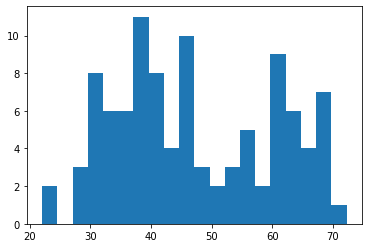

In [56]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Numbers are continous so mode is not appropriate.
# To determine whether mean or median is most appropriate, create a histogram
# Histogram shows that data is not normally distributed so median is more interpretable statistic

plt.hist(final_volumes["Tumor Volume (mm3)"],bins=20) 

st.normaltest(final_volumes["Tumor Volume (mm3)"]) 

In [65]:
# Determine if there are any potential outliers using upper and lower bounds
    # METHOD 1
    # Step 1: Determine first quartile and third quartile cutoff
    # Step 2: Determine difference between first quartile and third quartile cutoff to get interquartile range
    # Step 3: Multipy 1.5x interquartile range to 3rd quartile to get top cutoff for outliers 
    # Step 4: Multiply 1.5x interquartile range to 1st quartile for bottom cutoff
    
#quartiles = tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = np.percentile(tumor_volume, 25, interpolation="midpoint")
upperq = np.percentile(tumor_volume, 75, interpolation="midpoint")
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 37.149837274999996
The upper quartile of Tumor Volume (mm3)is: 60.00856799
The interquartile range of Tumor Volume (mm3) is: 22.858730715000007
The the median Tumor Volume (mm3) is: 45.0 
Values below 2.861741202499985 could be outliers.
Values above 94.29666406250001 could be outliers.


In [46]:
# Determine if there are any potential outliers using upper and lower bounds

# If the data is in a dataframe, we use pandas to give quartile calculations

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# Add subset 
    
    
# Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers.



In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ceftamin = final_volumes.loc[final_volumes["Drug Regimen"] == ("Ceftamin")] 
plt.boxplot(Ceftamin["Tumor Volume (mm3)"])

Infubinol = final_volumes.loc[final_volumes["Drug Regimen"] == ("Infubinol")] 

Ramicane = final_volumes.loc[final_volumes["Drug Regimen"] == ("Ramicane")] 

Capomulin = final_volumes.loc[final_volumes["Drug Regimen"] == ("Capomulin")]  


plt.boxplot((Ceftamin["Tumor Volume (mm3)"], (Infubinol["Tumor Volume (mm3)"]), (Ramicane["Tumor Volume (mm3)"]), (Capomulin["Tumor Volume (mm3)"]))

SyntaxError: unexpected EOF while parsing (<ipython-input-47-ff30dde9e958>, line 12)

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#list comprehension to get a random mouse ID from all the mice on the Capomulin regimen

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
drugs =[] 

for drug in drugs:
    filter_df = final_volumes.loc[final_volumes["Drug Regimen"]==drug]  
    
filter_df.head() 


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
